In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from hydranerv.models.network.neuron import Neuron
from hydranerv.models.network.network import Network
from hydranerv.models.network.dist_network import DistNetwork

In [3]:
def adjust_train(train, vmin, vrescale, offset):
    return [(x - vmin) / vrescale + offset for x in train]

In [4]:
N = 100
GC = 500
TMAX = 600
DT = .01
T_REF = .1
LAMBDA_D = .1
WNOISE = 5000

In [5]:
def simulate(num_pacemakers, display=False):
    
    P = num_pacemakers

    # initiate network
    ntwk = DistNetwork(num=N, 
                   gc=GC, 
                   dt=DT, 
                   tmax=TMAX, 
                   pacemakers=[], 
                   t_ref=T_REF, 
                   conn_type='gap_junction', 
                   lambda_d=LAMBDA_D,
                   wnoise=WNOISE,
                   seed=0)
    
    # define pacemakers
    ntwk.pacemakers = ntwk.find_nearst_neighbors(0, P)
    for i in range(P):
        n1 = ntwk.pacemakers[i]
        ntwk.neurons[n1].ispacemaker = True
    
    if display:
        # display connection matrix
        ntwk.disp_network()
    
    # run simulation
    ntwk.run()
    
    # display result
    ntwk.disp(figsize=(10, 10), style='spike', dpi=100)
    
    # display single
    plt.figure(figsize=(15,3))
    plt.plot(ntwk.neurons[25].v_train, lw=.5)
    plt.show()

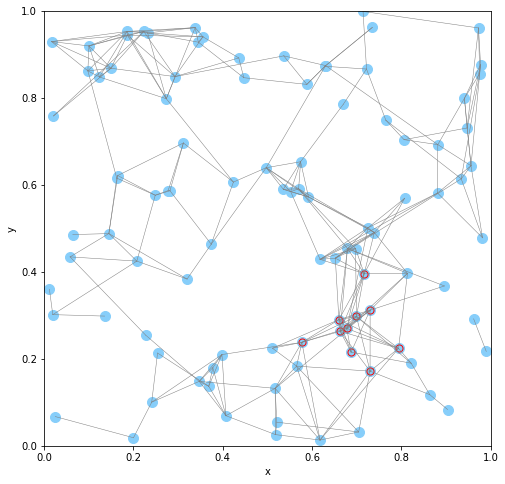

100%|██████████| 59999/59999 [00:34<00:00, 1742.85it/s]


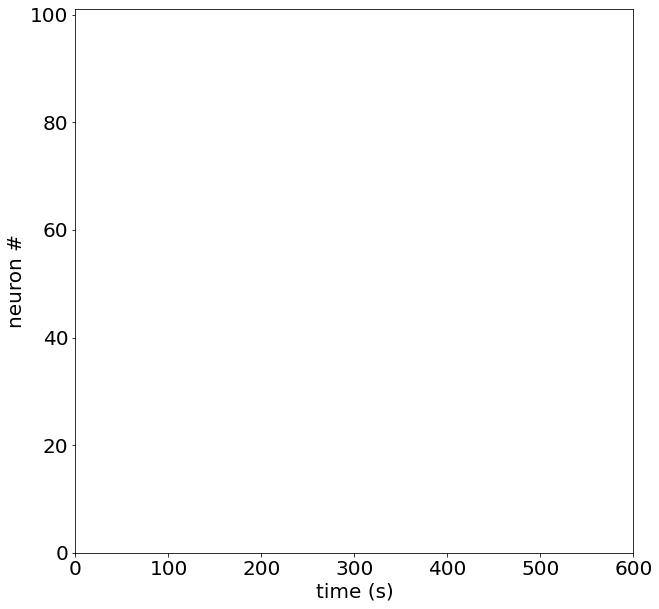

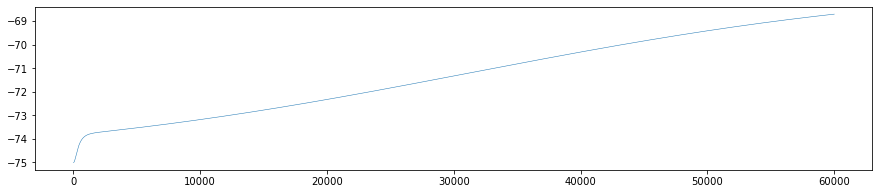

In [6]:
simulate(10, display=True)

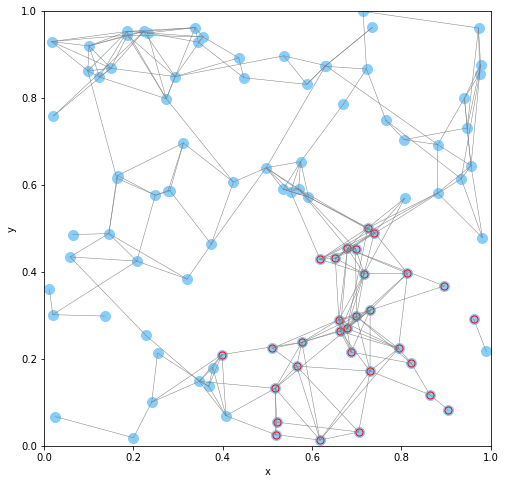

100%|██████████| 59999/59999 [00:36<00:00, 1645.60it/s]


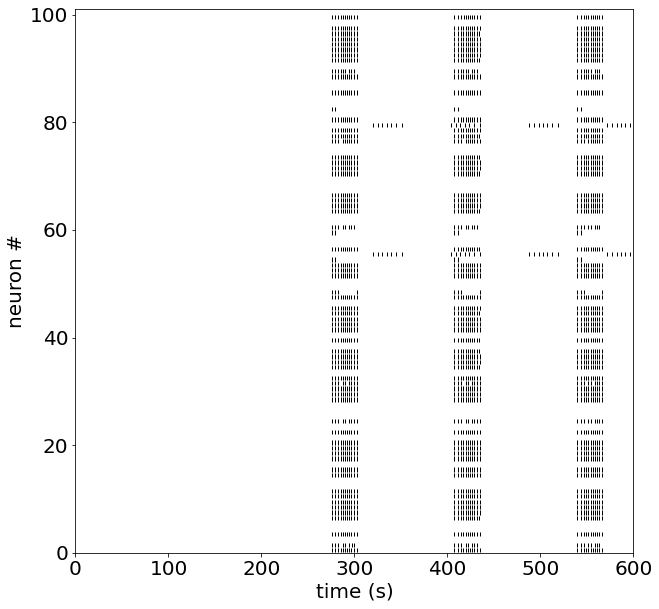

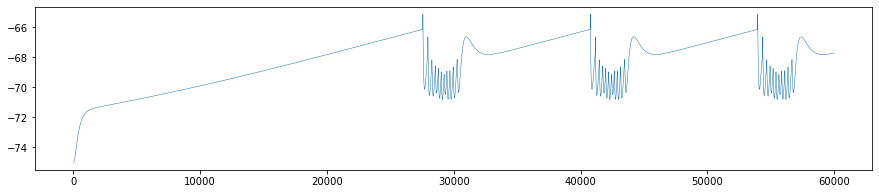

In [7]:
simulate(30, display=True)

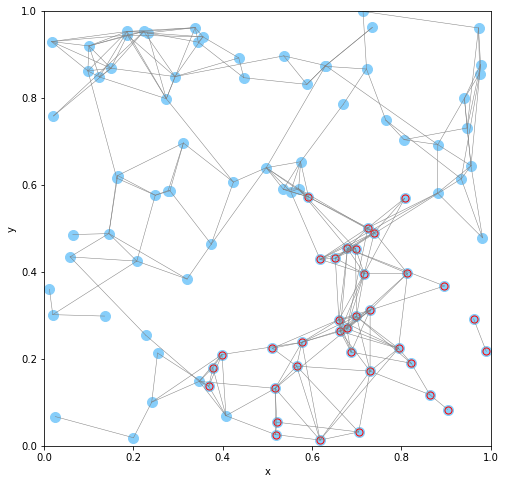

100%|██████████| 59999/59999 [00:37<00:00, 1613.17it/s]


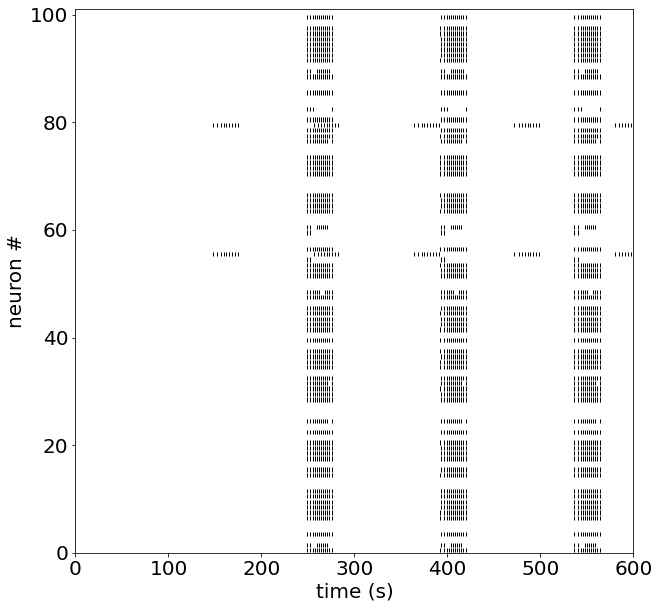

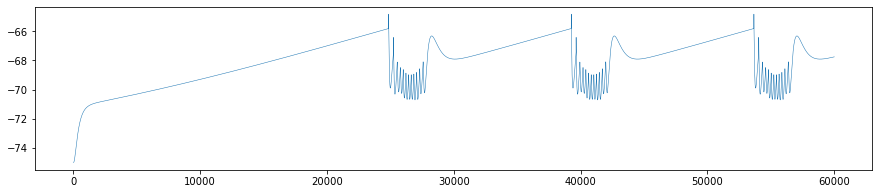

In [8]:
simulate(35, display=True)

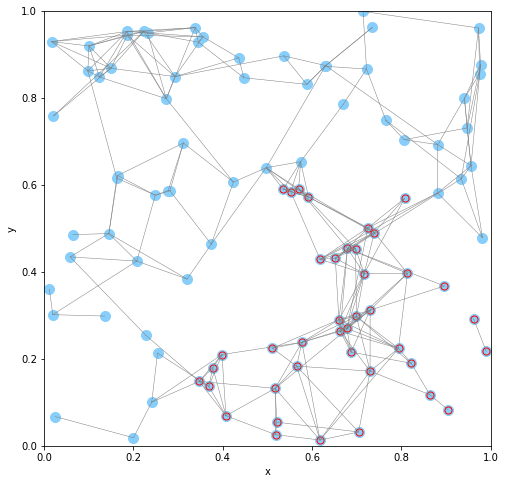

100%|██████████| 59999/59999 [00:37<00:00, 1600.80it/s]


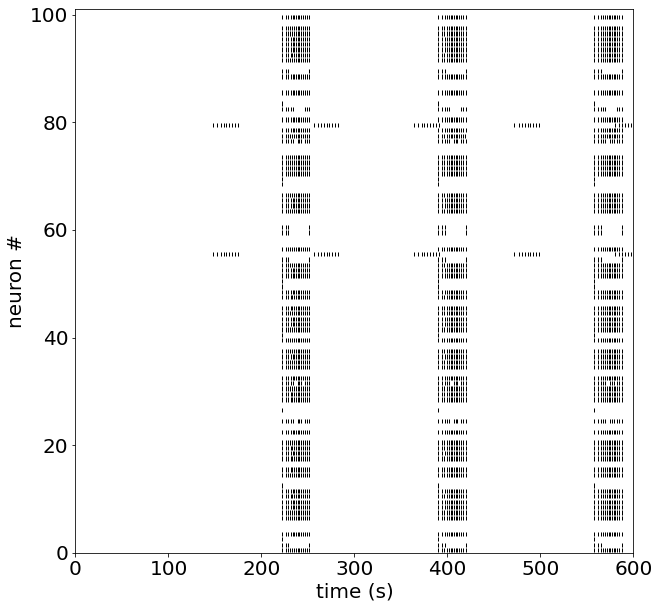

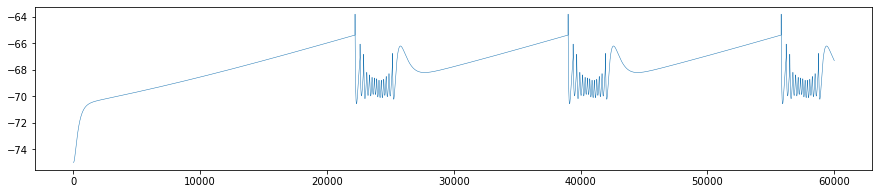

In [9]:
simulate(40, display=True)

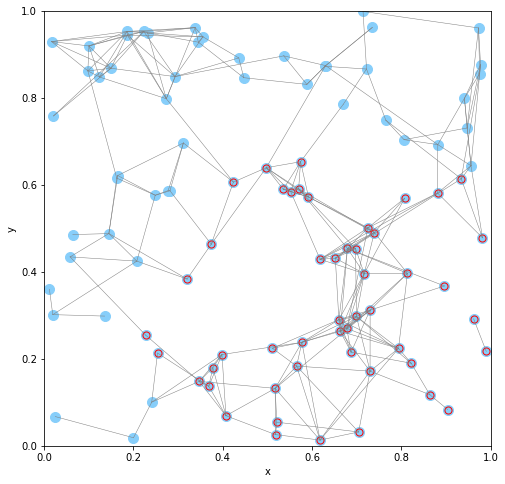

100%|██████████| 59999/59999 [00:38<00:00, 1568.20it/s]


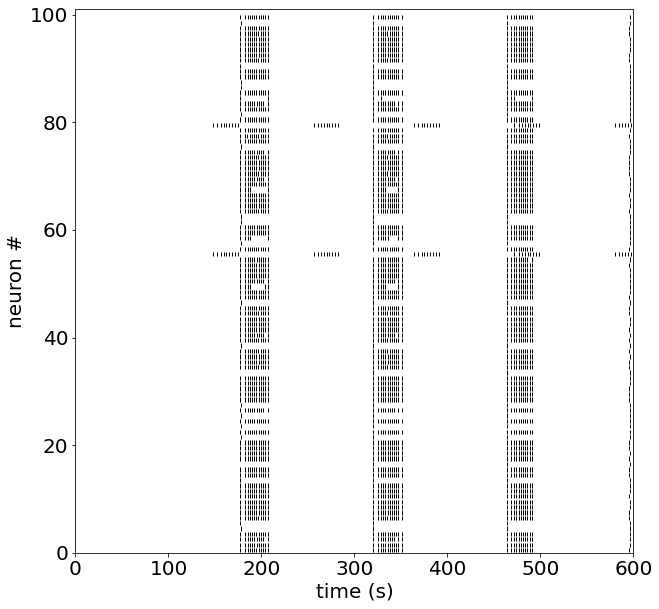

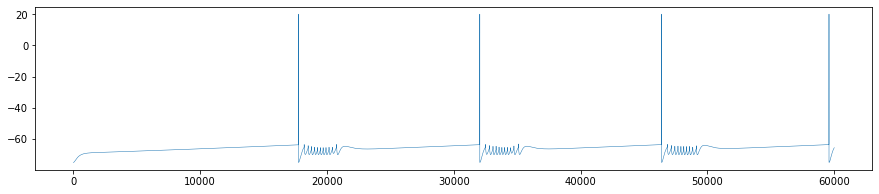

In [11]:
simulate(50, display=True)

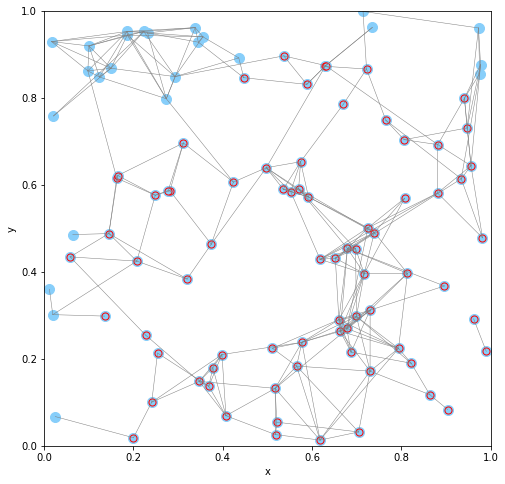

100%|██████████| 59999/59999 [00:40<00:00, 1476.19it/s]


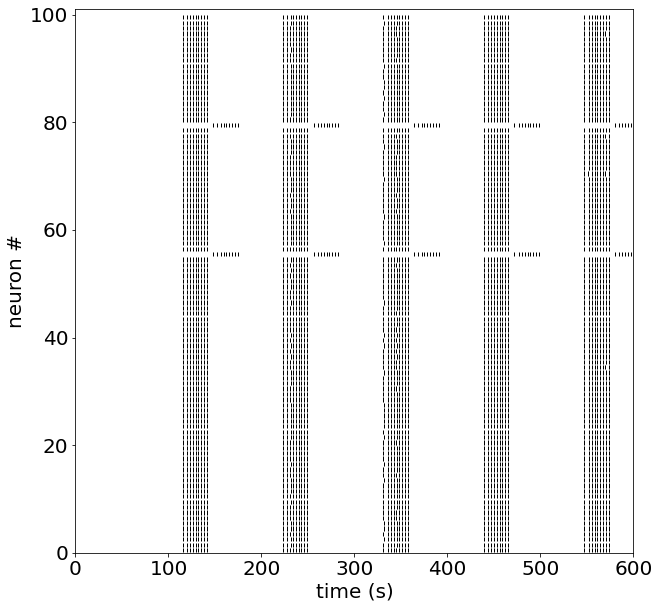

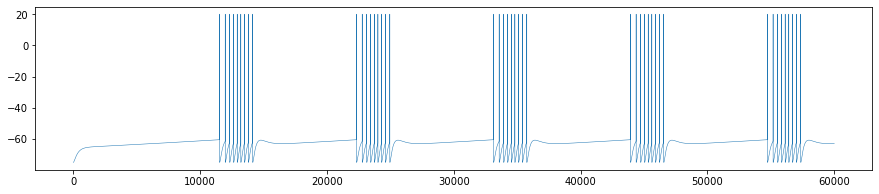

In [12]:
simulate(75, display=True)

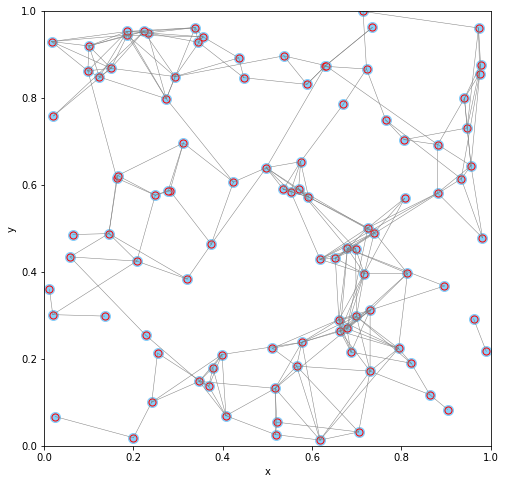

100%|██████████| 59999/59999 [00:42<00:00, 1403.91it/s]


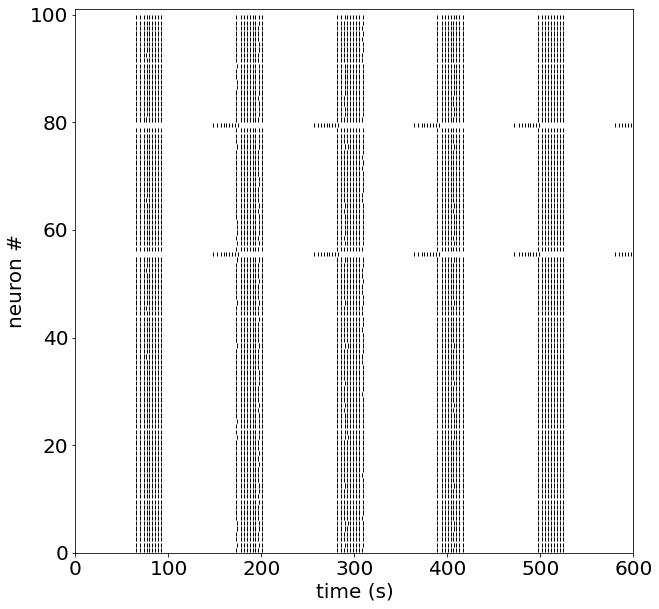

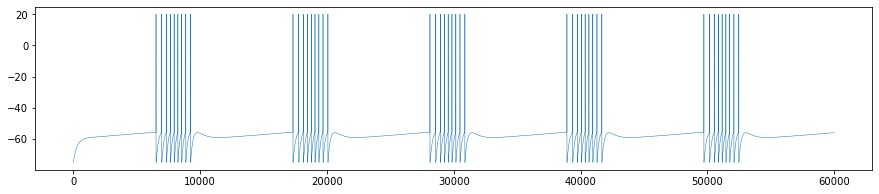

In [13]:
simulate(100, display=True)